# Convolutional Neural Networks 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 29s 2us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

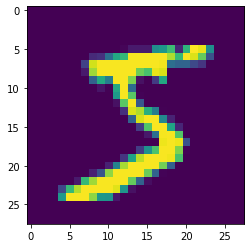

In [8]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
scaled_single = x_train[0]

In [19]:
scaled_single.max()

1.0

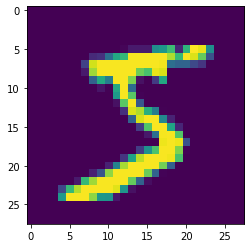

In [20]:
plt.imshow(scaled_single)

## Reshaping the Data

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000,28,28,1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [32]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1399 - accuracy: 0.9582 - val_loss: 0.0532 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0429 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0394 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0412 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0543 - val_accuracy: 0.9845


## Evaluate the Model

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.139907,0.958150,0.053226,0.9826
1,0.045187,0.985900,0.042851,0.9861
2,0.029008,0.990933,0.039401,0.9876
3,0.020178,0.993600,0.041209,0.9878
4,0.013708,0.995300,0.054281,0.9845


<AxesSubplot:>

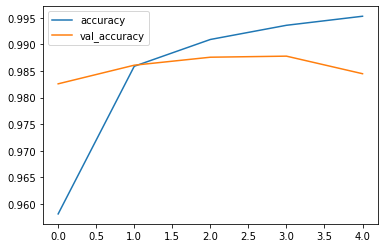

In [36]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

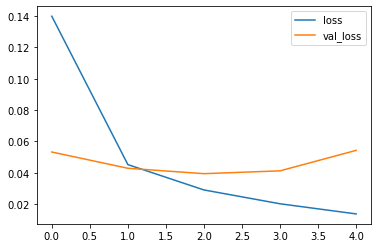

In [37]:
losses[['loss','val_loss']].plot()

In [39]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.05428115278482437, 0.984499990940094]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [44]:
predictions[0]

7

In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       1.00      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [47]:
confusion_matrix(y_test,predictions)

array([[ 977,    1,    1,    0,    0,    0,    0,    0,    1,    0],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   3,    1, 1018,    0,    1,    0,    0,    5,    4,    0],
       [   1,    0,    2, 1000,    0,    2,    0,    2,    3,    0],
       [   1,    1,    1,    0,  976,    0,    1,    0,    0,    2],
       [   2,    0,    0,    6,    0,  881,    0,    0,    3,    0],
       [   8,    4,    1,    1,    4,    7,  929,    0,    4,    0],
       [   1,    3,    7,    0,    1,    0,    0, 1013,    1,    2],
       [   5,    1,    1,    0,    0,    0,    0,    1,  966,    0],
       [   4,    3,    1,    6,   13,   14,    0,    7,    8,  953]],
      dtype=int64)

In [48]:
import seaborn as sns

<AxesSubplot:>

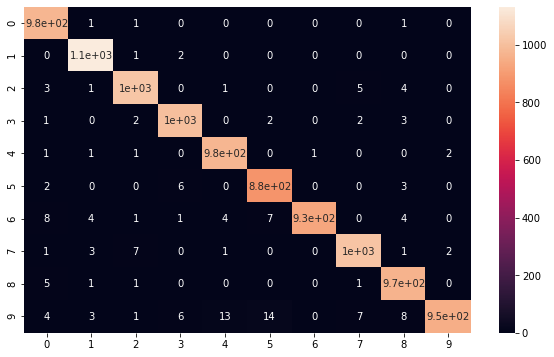

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [50]:
my_number = x_test[0]

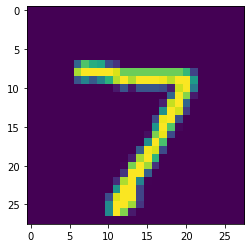

In [51]:
plt.imshow(my_number.reshape(28,28))

In [52]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)